<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


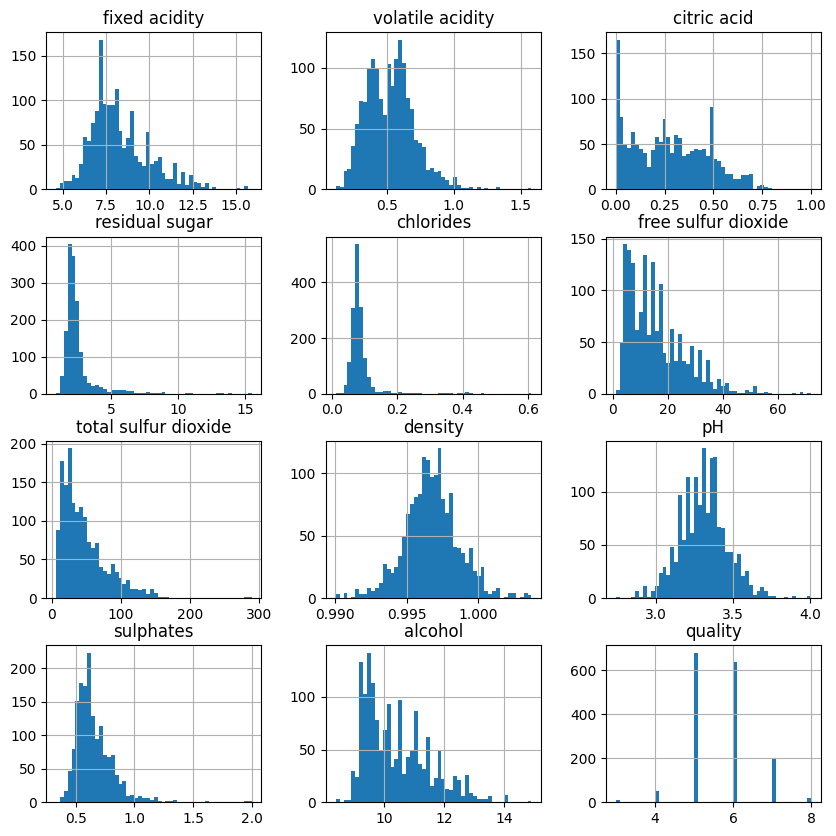

[[ 7.4    0.7    0.    ...  9.4    5.     0.   ]
 [ 7.8    0.88   0.    ...  9.8    5.     0.   ]
 [ 7.8    0.76   0.04  ...  9.8    5.     0.   ]
 ...
 [ 6.3    0.51   0.13  ... 11.     6.     0.   ]
 [ 5.9    0.645  0.12  ... 10.2    5.     0.   ]
 [ 6.     0.31   0.47  ... 11.     6.     0.   ]]
Predict (Logistic Classifier): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.

Model     Score
2  Neural Network Classifier  0.996875
0         LogisticRegression  0.993750
1             SVM Classifier  0.871875

In [4]:
# -*- coding: utf-8 -*-
"""task1

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Jo16meIXg3WIr5N_Kx5oZuyrR7qtqdUM

Classification
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from warnings import filterwarnings
from sklearn.metrics import accuracy_score,confusion_matrix
filterwarnings(action='ignore')

"""Load data"""

wine = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/winequality-red.csv")
wine.sample(15)

wine.info()

wine.describe()

wine.isnull().sum()

wine.groupby('quality').mean()

"""Data visualization"""

wine.hist(figsize=(10,10),bins=50)
plt.show()

"""Data normalization"""

wine['quality'].unique()

wine['goodquality'] = [1 if x >=7 else 0 for x in wine['quality']]
wine.sample(5)

df = wine.values
X = wine.values[:,:-1]
Y = wine.values[:,-1]

scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.fit_transform(X)
print(df)

"""Data preparing for Machine learning modeling"""

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=7, test_size=0.2)

model_res=pd.DataFrame(columns=['Model','Score'])

"""Training"""

def deploy_logistic_classifier(model, X_test):
    y_pred = model.predict(X_test)
    model_res.loc[len(model_res)] = ['LogisticRegression', accuracy_score(Y_test,y_pred)]
    print("Predict (Logistic Classifier):", y_pred)
    print(classification_report(Y_test, y_pred))

def deploy_svm_classifier(model, X_test):
    y_pred = model.predict(X_test)
    model_res.loc[len(model_res)] = ['SVM Classifier', accuracy_score(Y_test,y_pred)]
    print("Predict (SVM Classifier):", y_pred)
    print(classification_report(Y_test, y_pred))

def deploy_neural_network_classifier(model, X_test):
    y_pred = model.predict(X_test)
    model_res.loc[len(model_res)] = ['Neural Network Classifier', accuracy_score(Y_test,y_pred)]
    print("Predict (Neural Network Classifier):", y_pred)
    print(classification_report(Y_test, y_pred))

"""Prediction and Evaluation"""

model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
deploy_logistic_classifier(model_logistic, X_test)
model_res

model_svm = SVC()
model_svm.fit(X_train, Y_train)
deploy_svm_classifier(model_svm, X_test)
model_res

model_neural_network = MLPClassifier()
model_neural_network.fit(X_train, Y_train)
deploy_neural_network_classifier(model_neural_network, X_test)
model_res

model_res = model_res.sort_values(by='Score',ascending=False)
model_res

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
